# Smoothing and Blurring (Defocusing)

- Images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.
- The goal here is to use a low-pass filter to reduce the amount of noise and detail in an image. Practically, this means that each pixel in the image is mixed in with its surrounding pixel intensities.
- **This is a very important preprocessing step**

By smoothing an image prior to applying techniques such as edge detection or thresholding we are able to reduce the amount of high-frequency content, such as noise and edges


- [GFG](https://www.geeksforgeeks.org/python-opencv-smoothing-and-blurring/)


In [1]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from PIL import Image

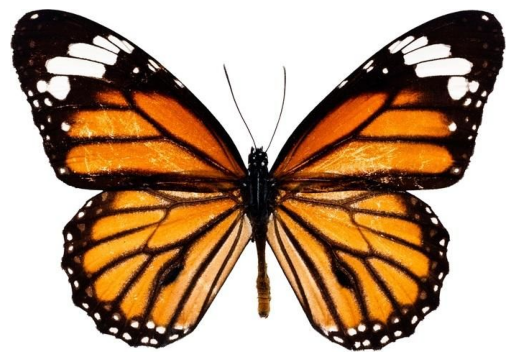

In [2]:
image = Image.open("./resources/Butterfly.jpg")

plt.imshow(image)
plt.axis('off')
plt.show()

image = np.array(image.convert('L'))

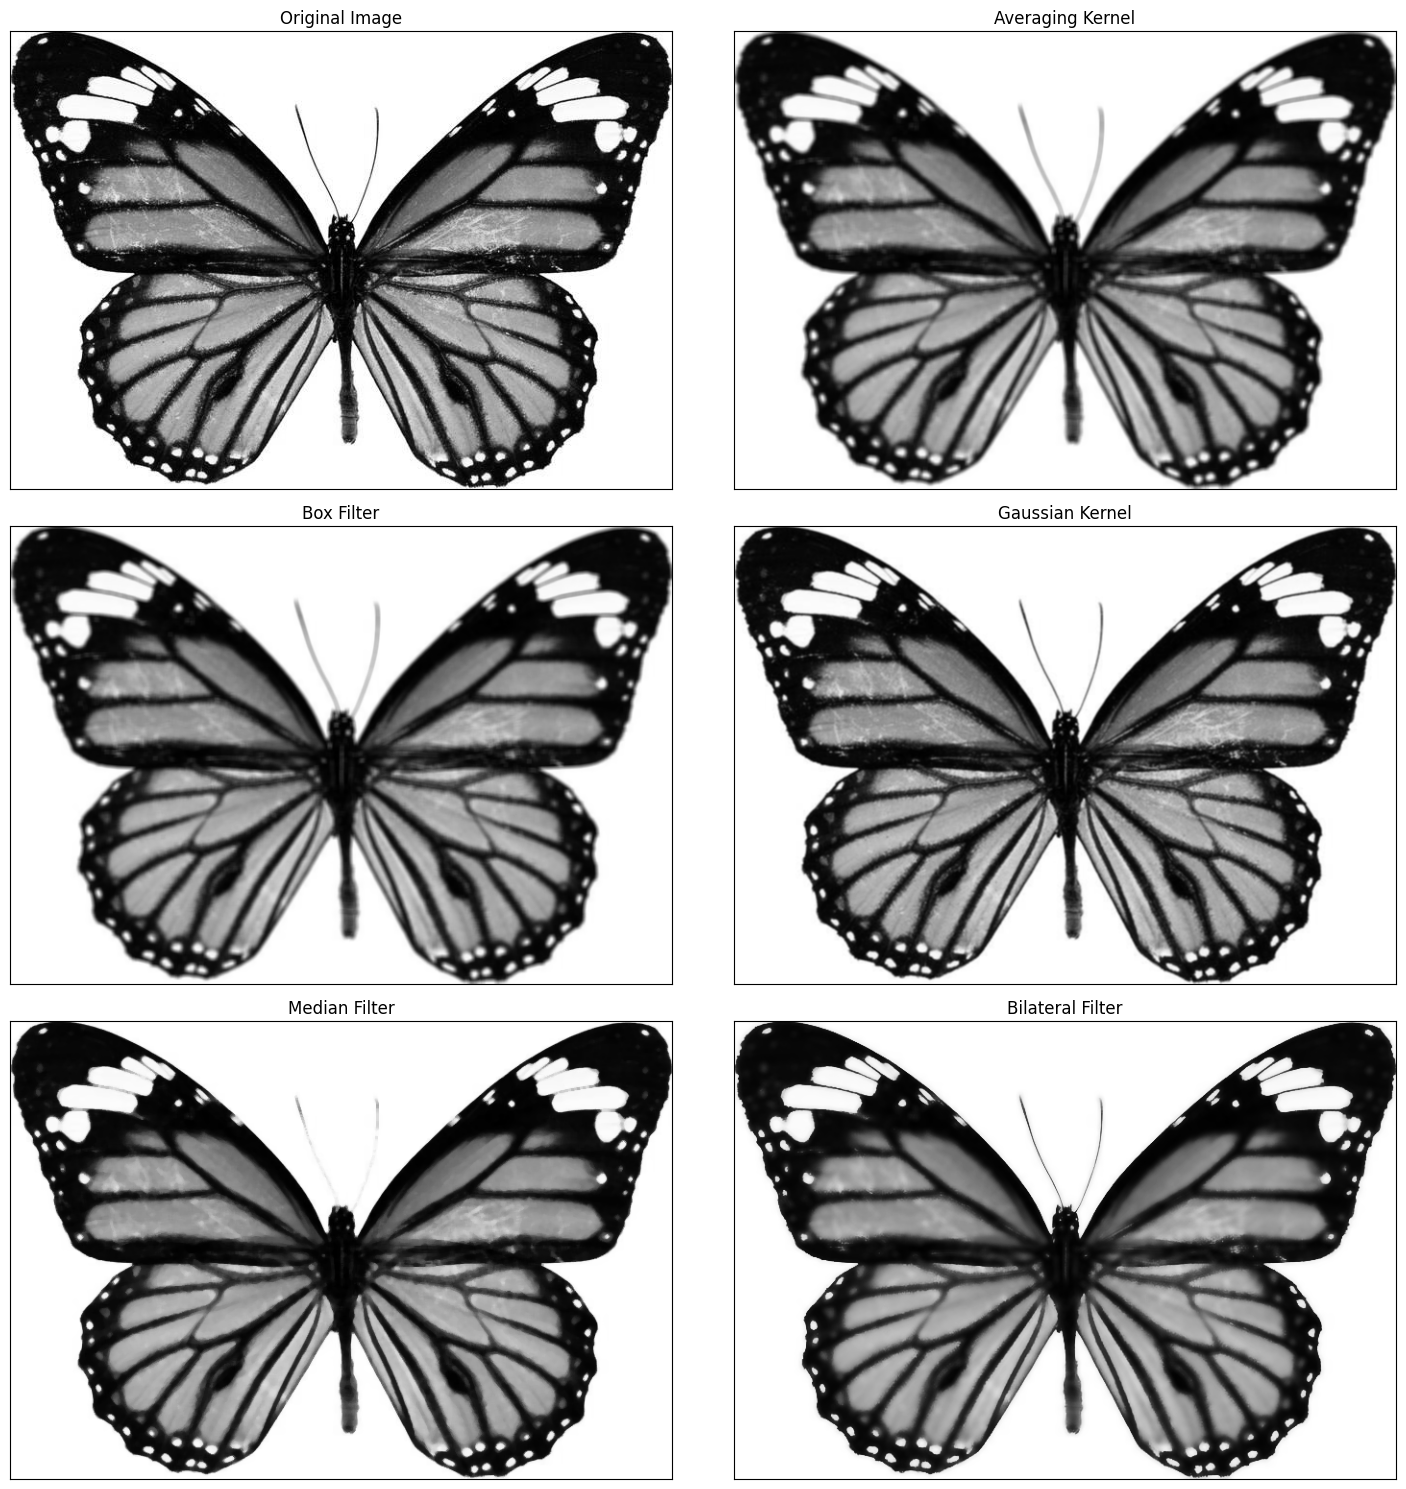

In [3]:
# Using 5x5 Averaging Kernel
kernel2 = np.ones((5, 5), np.float32)/25
img = cv2.filter2D(src = image, ddepth = -1, kernel = kernel2) # -1 is the depth of the destination image

# Using Averaging Kernel inbuilt (Box Filter)
img2 = cv2.blur(image, (5, 5))


# Using 5x5 Gaussian Kernel
# kernel3 = cv2.getGaussianKernel(5, 1)
# img3 = cv2.filter2D(src = image, ddepth = -1, kernel = kernel3*kernel3.T)
img3 = cv2.GaussianBlur(image, (3, 3), 0) 

# Using 5x5 Median Filter
img4 = cv2.medianBlur(image, 5)

# Using 5x5 Bilateral Filter
img5 = cv2.bilateralFilter(image, 9, 75, 75) # The other 2 are SigmaColor and SigmaSpace


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(img, cmap='gray')
ax[1].set_title('Averaging Kernel')
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(img2, cmap='gray')
ax[2].set_title('Box Filter')
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[3].imshow(img3, cmap='gray')
ax[3].set_title('Gaussian Kernel')
ax[3].set_xticks([])
ax[3].set_yticks([])

ax[4].imshow(img4, cmap='gray')
ax[4].set_title('Median Filter')
ax[4].set_xticks([])
ax[4].set_yticks([])

ax[5].imshow(img5, cmap='gray')
ax[5].set_title('Bilateral Filter')
ax[5].set_xticks([])
ax[5].set_yticks([])

plt.tight_layout()

# More types of Blurring
1. Motion Blur
1. Haze

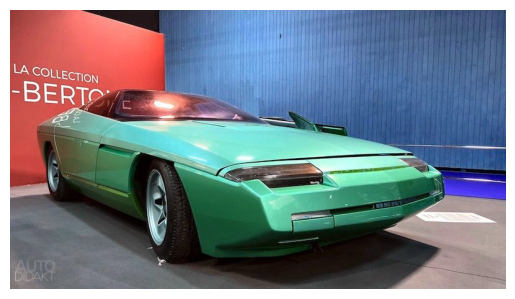

In [4]:
img = cv2.imread("./resources/Car.jpeg")

plt.imshow(img)
plt.axis('off')
plt.show()

[]

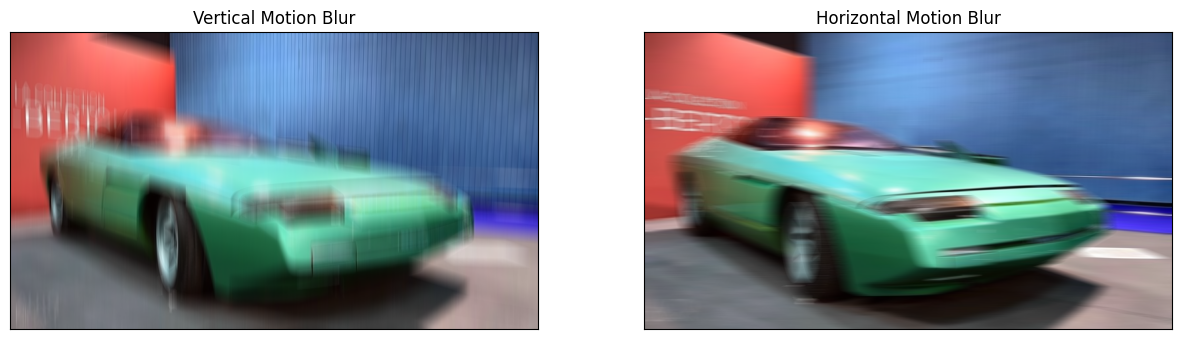

In [5]:
# Motion Blur - https://www.geeksforgeeks.org/opencv-motion-blur-in-python/

# The greater the size, the more the motion. 
kernel_size = 30
  
# Create the vertical kernel. 
kernel_v = np.zeros((kernel_size, kernel_size)) 
# Horizontal Kernels
kernel_h = np.copy(kernel_v) 
  
# Fill the middle row with ones. 
kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size) 
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size) 

kernel_v /= kernel_size 
kernel_h /= kernel_size 
  

vertical_mb = cv2.filter2D(img, -1, kernel_v) 
horizonal_mb = cv2.filter2D(img, -1, kernel_h)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(vertical_mb, cmap='gray')
ax[0].set_title('Vertical Motion Blur')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(horizonal_mb, cmap='gray')
ax[1].set_title('Horizontal Motion Blur')
ax[1].set_xticks([])
ax[1].set_yticks([])

# Sharpening

- [From here](https://www.analyticsvidhya.com/blog/2021/08/sharpening-an-image-using-opencv-library-in-python/)

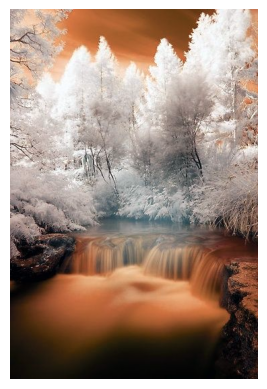

In [7]:
image = cv2.imread("./resources/forest.jpeg")

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

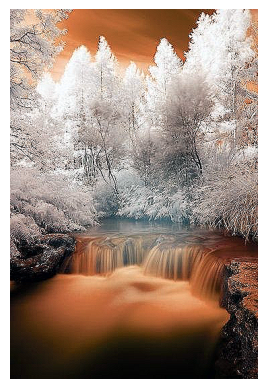

In [9]:
plt.imshow(image_sharp, cmap='gray')
plt.axis('off')
plt.show()